# Build an alanine residue

Setup the AMBER paths.

In [1]:
(setf (logical-pathname-translations "amber") 
      (list (list "**;*.*" (concatenate 'string (ext:getenv "AMBERHOME") "/**/*.*"))))
(leap.core:clear-path)
(leap.core:add-path "amber:dat;leap;prep;")
(leap.core:add-path "amber:dat;leap;lib;")
(leap.core:add-path "amber:dat;leap;parm;")
(leap.core:add-path "amber:dat;leap;cmd;")
(add-path "amber:dat;antechamber;")

(#P"/Users/meister/Development/amber18/dat/antechamber/"
 #P"/Users/meister/Development/amber18/dat/leap/cmd/"
 #P"/Users/meister/Development/amber18/dat/leap/parm/"
 #P"/Users/meister/Development/amber18/dat/leap/lib/"
 #P"/Users/meister/Development/amber18/dat/leap/prep/")

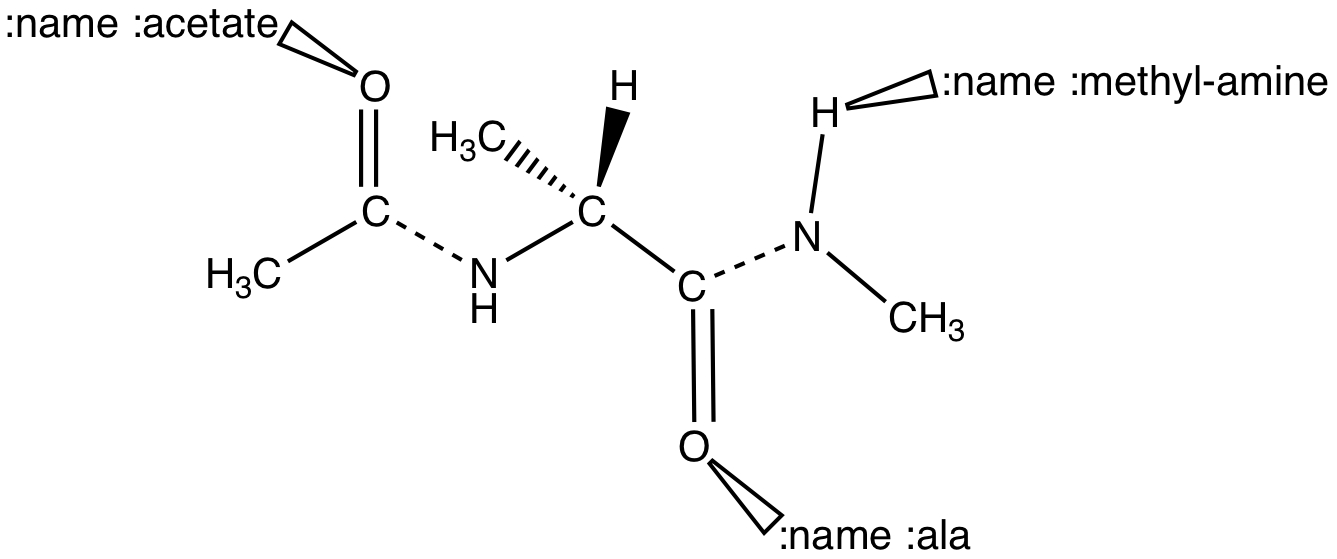

In [2]:
(cl-jupyter-user:png-from-file "data/alanine/alanine.png")

Load the residue from a Chemdraw sketch. Put the aggregate in 

In [3]:
(apropos "load-chem")

LOAD-CHEM-DRAW  Function
LOAD-CHEM-DRAW-AGGREGATE  Function


NIL

In [4]:
(:= *chemagg* (load-chem-draw-aggregate "data/alanine/alanine2.cdxml"))

*CHEMAGG*

In [5]:
(load-atom-type-rules "ATOMTYPE_AMBER.DEF")

(#<FORCE-FIELD ATOMTYPE_AMBER.DEF>)

In [6]:
(show *chemagg*)

A Jupyter Widget

In [7]:
(:= *stereocenters* (cando:gather-stereocenters *chemagg*))

*STEREOCENTERS*

In [8]:
(set-stereoisomer-func *stereocenters* (lambda (c) :R))

NIL

In [9]:
(chem:set-property *chemagg* :solvent-box '(50.0 50.0 50.0))

NIL

In [10]:
(save-mol2 *chemagg* "alanine2.mol2")
(easy-gaff)
(jostle *chemagg*)
(energy:minimize *chemagg*)

Saving matter to /Users/meister/Development/demos/alanine2.mol2
minimize-no-fail
======= Starting Steepest Descent Minimizer
---Stage-Seconds--Step-log(Alpha)--Dir-------------Energy-----------RMSforce
 minSDnP       0     1      -inf   0.0              0.000         203944.241
 minSDnP       0     2     -7.95   0.0       88384536.247          55449.334
 minSDnP       0     3     -7.77   0.0       45457316.205          33459.385
 minSDnP       0     4     -7.80   0.0       30304709.551          24820.598
 minSDnP       0     5     -7.72   0.0       21298970.943          20730.233
 minSDnP       0     6     -7.79   0.0       15418969.527          16298.012
 minSDnP       0     7     -7.70   0.0       11445767.816          14163.111
 minSDnP       0     8     -7.77   0.0        8668042.271          11520.482
 minSDnP       0     9     -7.68   0.0        6637256.463          10265.904
 minSDnP       0    10     -7.76   0.0        5151046.467           8570.855
---Stage-Seconds--Step-log(A

Warning!  Skipping 10-12 hbond

Warning!  Skipping force field atom equivalences



#<ENERGY-FUNCTION >

In [11]:
(show *chemagg*)

A Jupyter Widget

In [17]:
(leap.topology:save-amber-parm-format *chemagg* "chemagg.top" "chemagg.crd")

T

In [18]:
(load-off "tip3pfbox.off")

(:TIP3PFBOX)

In [20]:
(show ~tip3pfbox)

A Jupyter Widget